In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
dataset['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

# Data Description

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Analyse

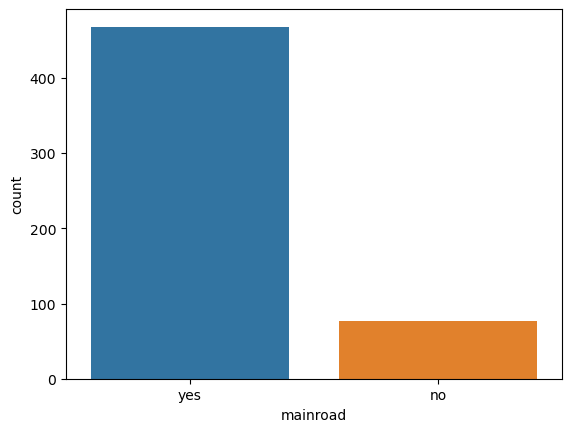

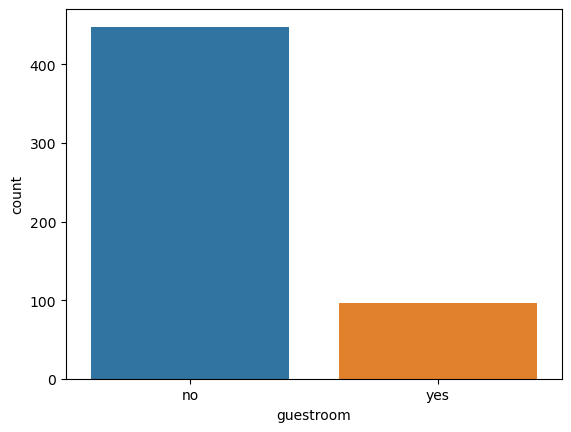

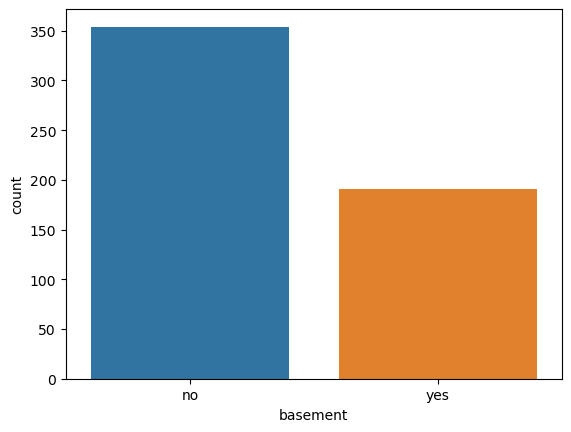

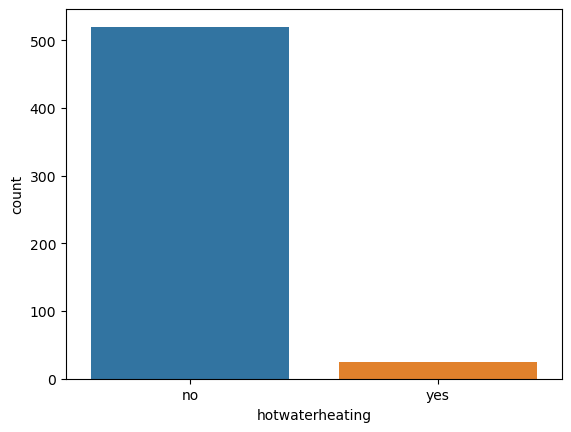

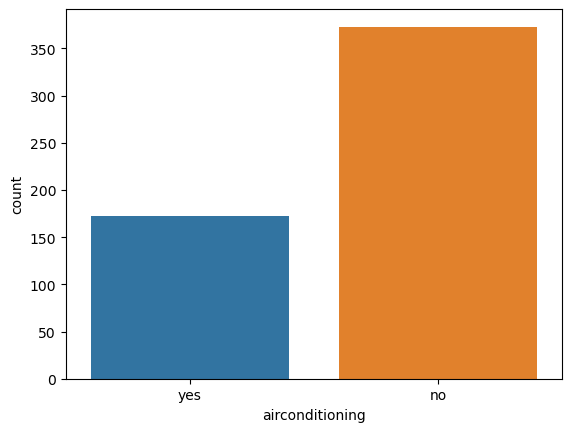

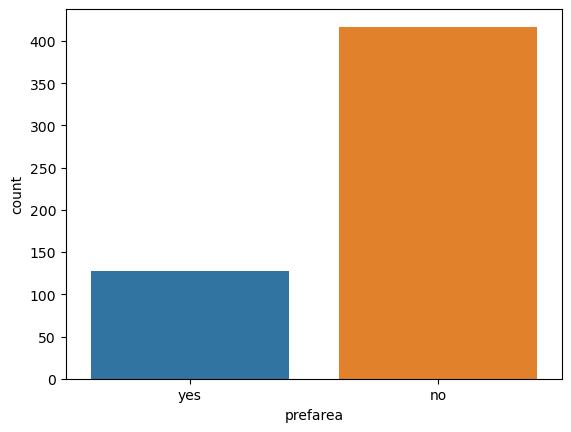

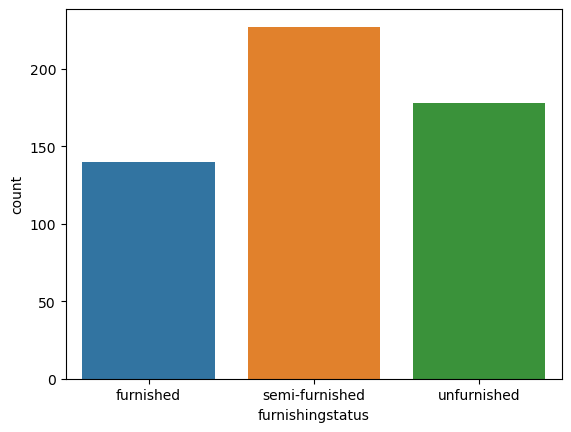

In [6]:
for column in dataset.select_dtypes(include='object').columns:

    sns.countplot( x= dataset[column])
    plt.show()

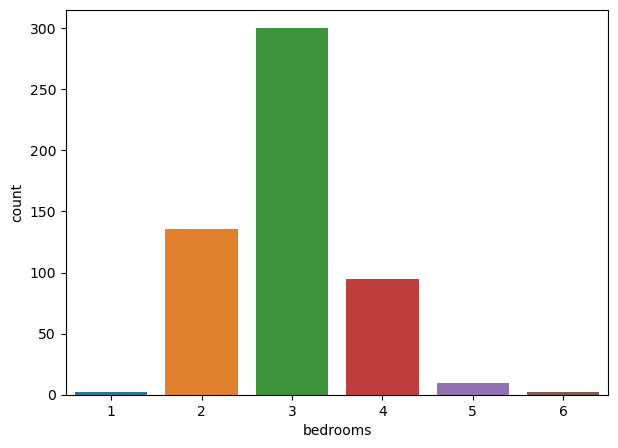

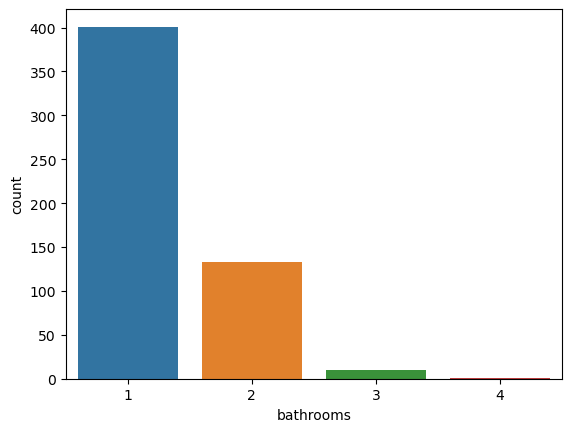

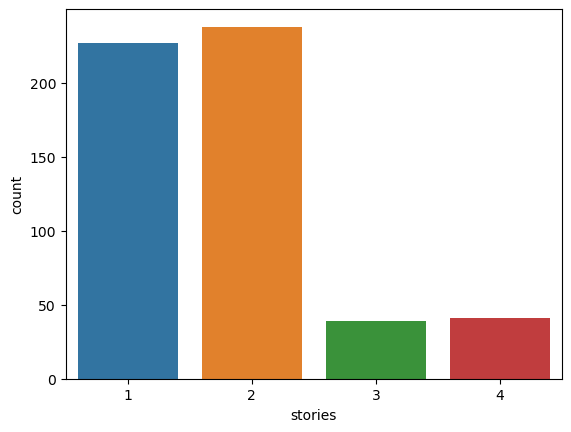

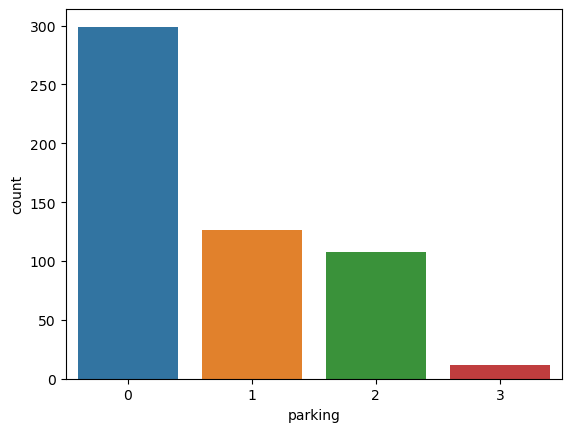

In [7]:
plt.figure(figsize=(7,5))
for column in dataset.select_dtypes(exclude='object').columns[2:]:

    sns.countplot( x= dataset[column])
    plt.show()

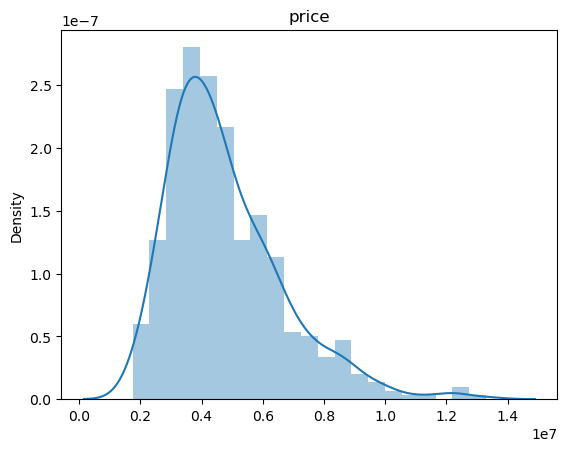

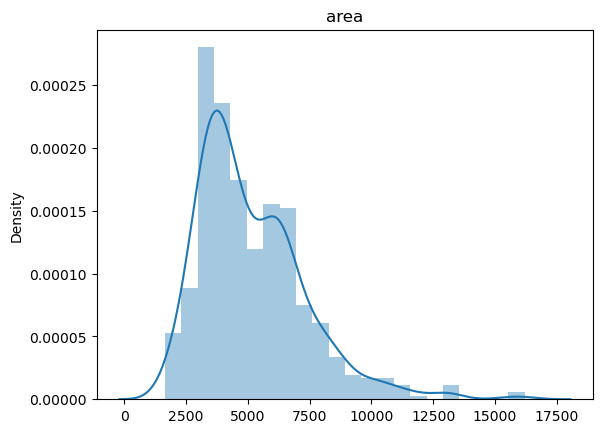

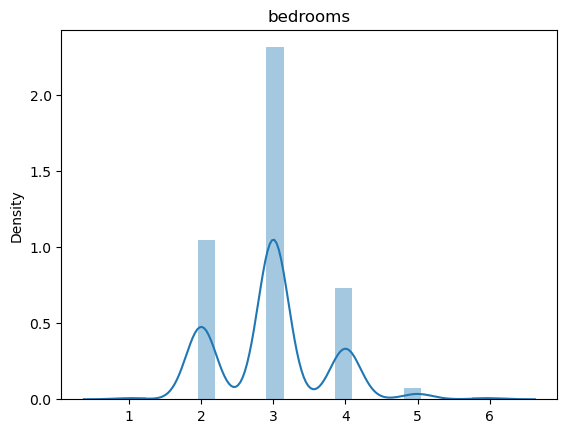

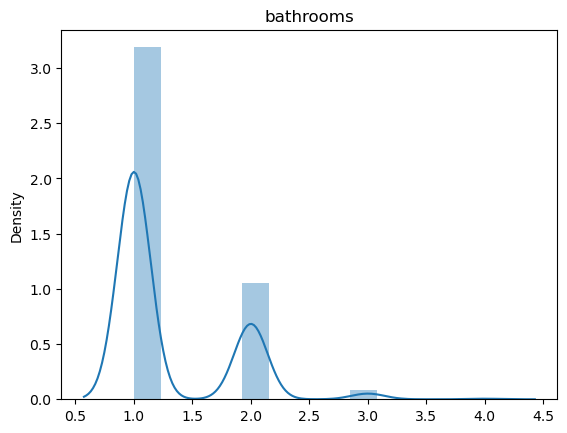

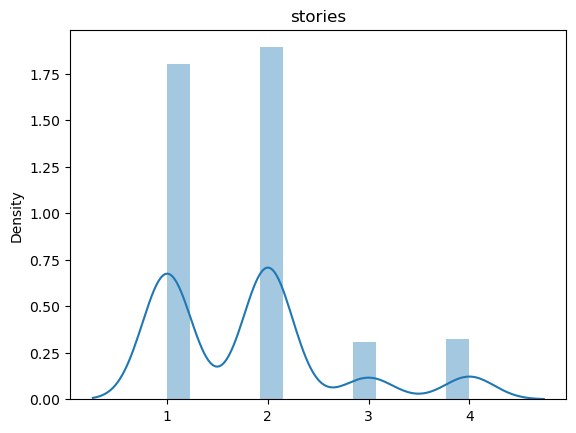

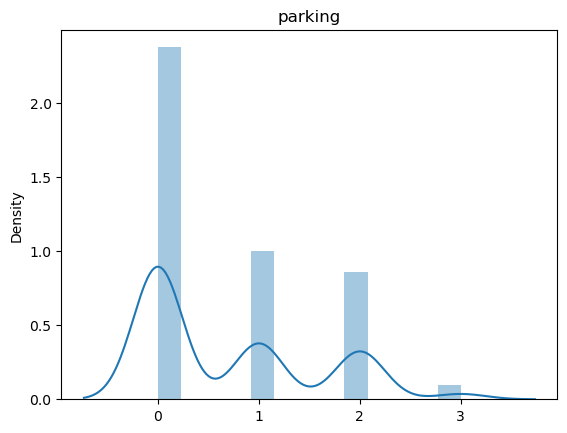

In [8]:
for column in dataset.select_dtypes(exclude='object').columns:
    sns.distplot( x= dataset[column])
    plt.title(column)
    plt.show()

In [9]:
dataset['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [10]:
dataset['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [11]:
for column in dataset.select_dtypes(include='object').columns:
    print("*"*20)
    print(dataset[column].value_counts())

********************
mainroad
yes    468
no      77
Name: count, dtype: int64
********************
guestroom
no     448
yes     97
Name: count, dtype: int64
********************
basement
no     354
yes    191
Name: count, dtype: int64
********************
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
********************
airconditioning
no     373
yes    172
Name: count, dtype: int64
********************
prefarea
no     417
yes    128
Name: count, dtype: int64
********************
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [12]:
for column in dataset.select_dtypes(include='object').columns:
    if column != "furnishingstatus" :
        dataset[column] = pd.get_dummies(dataset[column] , drop_first=True ,dtype=int)
    
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
var = pd.get_dummies(dataset["furnishingstatus"] , drop_first=True ,dtype=int)
    

In [14]:
dataset = pd.concat([dataset , var] , axis = 1)
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [15]:
dataset.drop(['furnishingstatus'] , axis =1 , inplace = True)

<Axes: >

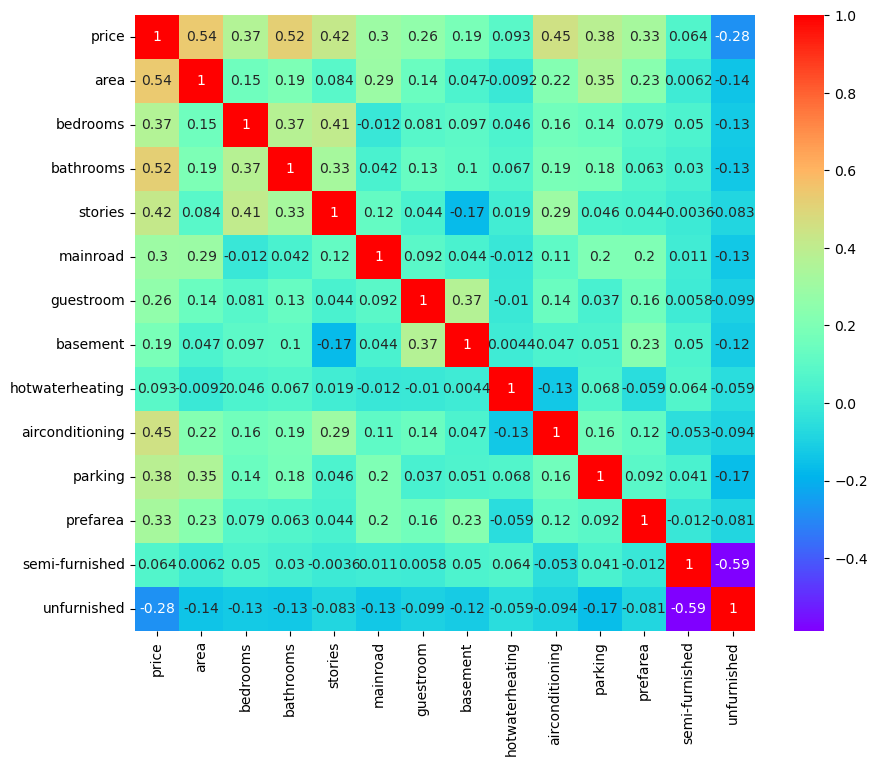

In [20]:
plt.figure(figsize= (10 , 8))
sns.heatmap(dataset.corr() , annot = True , cmap='rainbow')

In [271]:
dataset['room area'] = dataset["bedrooms"] *1176.1420

In [272]:
dataset['bathrooms area'] = dataset["bedrooms"] *1147.3457

In [273]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,room area,bathrooms area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,4704.568,4589.3828
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,4704.568,4589.3828
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3528.426,3442.0371
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,4704.568,4589.3828
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,4704.568,4589.3828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1,2352.284,2294.6914
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,3528.426,3442.0371
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1,2352.284,2294.6914
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,3528.426,3442.0371


In [274]:
 x = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [275]:

import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              924.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:10:27   Log-Likelihood:                         -8331.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     532   BIC:                                  1.674e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [276]:
1176.1420 * 4

4704.568

In [277]:
x.drop(["semi-furnished"] , axis = 1 , inplace = True)

In [278]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 77)

In [279]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,room area,bathrooms area
356,2520,5,2,1,0,0,1,0,1,1,0,0,5880.710,5736.7285
539,2990,2,1,1,0,0,0,0,0,1,0,1,2352.284,2294.6914
249,4990,4,2,2,1,1,1,0,0,0,1,0,4704.568,4589.3828
123,7320,4,2,2,1,0,0,0,0,0,0,0,4704.568,4589.3828
527,1836,2,1,1,0,0,1,0,0,0,0,0,2352.284,2294.6914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3700,4,1,2,1,1,0,0,1,0,0,0,4704.568,4589.3828
167,4600,2,2,1,1,0,0,0,1,2,0,0,2352.284,2294.6914
441,4370,3,1,2,1,0,0,0,0,0,0,1,3528.426,3442.0371
293,4410,2,1,1,0,0,0,0,0,1,0,1,2352.284,2294.6914


In [280]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [281]:
x_train = pd.DataFrame(data = x_train ,  columns = x.columns )
x_test = pd.DataFrame(data = x_test ,  columns = x.columns )

In [282]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,room area,bathrooms area
0,-1.178957,2.842540,1.472795,-0.940780,-2.408319,-0.482316,1.398757,-0.208514,1.445998,0.334027,-0.550921,-0.695440,2.842540,2.842540
1,-0.968845,-1.279817,-0.543649,-0.940780,-2.408319,-0.482316,-0.714920,-0.208514,-0.691564,0.334027,-0.550921,1.437939,-1.279817,-1.279817
2,-0.074753,1.468421,1.472795,0.243906,0.415227,2.073331,1.398757,-0.208514,-0.691564,-0.820914,1.815141,-0.695440,1.468421,1.468421
3,0.966864,1.468421,1.472795,0.243906,0.415227,-0.482316,-0.714920,-0.208514,-0.691564,-0.820914,-0.550921,-0.695440,1.468421,1.468421
4,-1.484737,-1.279817,-0.543649,-0.940780,-2.408319,-0.482316,1.398757,-0.208514,-0.691564,-0.820914,-0.550921,-0.695440,-1.279817,-1.279817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.651443,1.468421,-0.543649,0.243906,0.415227,2.073331,-0.714920,-0.208514,1.445998,-0.820914,-0.550921,-0.695440,1.468421,1.468421
404,-0.249101,-1.279817,1.472795,-0.940780,0.415227,-0.482316,-0.714920,-0.208514,1.445998,1.488968,-0.550921,-0.695440,-1.279817,-1.279817
405,-0.351922,0.094302,-0.543649,0.243906,0.415227,-0.482316,-0.714920,-0.208514,-0.691564,-0.820914,-0.550921,1.437939,0.094302,0.094302
406,-0.334040,-1.279817,-0.543649,-0.940780,-2.408319,-0.482316,-0.714920,-0.208514,-0.691564,0.334027,-0.550921,1.437939,-1.279817,-1.279817


In [283]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train )

LinearRegression()

In [284]:
predict_train_lr = lr.predict(x_train)
predict_test_lr = lr.predict(x_test)

In [285]:
from sklearn import metrics

print("Train : " , metrics.root_mean_squared_error(y_train , predict_train_lr))
print()
print("Test : " , metrics.root_mean_squared_error(y_test , predict_test_lr))

Train :  1024893.0942511256

Test :  1160700.1803846469


In [286]:

print("Train : " , metrics.mean_absolute_error(y_train , predict_train_lr))
print()
print("Test : " , metrics.mean_absolute_error(y_test , predict_test_lr))

Train :  764910.1149325809

Test :  792090.053395744


In [287]:

print("Train : " , metrics.r2_score(y_train , predict_train_lr))
print()
print("Test : " , metrics.r2_score(y_test , predict_test_lr))

Train :  0.6716094582861134

Test :  0.6854883932349396


In [288]:
lr.coef_

array([ 562543.89704722,   25067.17645523,  518007.89314574,
        340244.80210192,  173363.36980857,  126645.96377075,
        128137.19760575,  190270.97751209,  392089.85223253,
        166718.69933779,  249553.38387111, -168615.67990737,
         25067.17645523,   25067.17645523])

In [289]:
pd.DataFrame({'Actuall values' : y_train , "Predicted values" : predict_train_lr})

,Actuall values,Predicted values
356,3773000,4.939999e+06
539,1855000,2.234977e+06
249,4543000,6.233864e+06
123,5950000,5.634858e+06
527,2275000,2.382777e+06
...,...,...
117,5950000,4.841733e+06
167,5285000,5.564286e+06
441,3220000,3.385392e+06
293,4200000,2.592083e+06


# RandomForestRegression

In [290]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor( criterion='absolute_error' , n_estimators = 200 , ccp_alpha=3 )
rfr.fit(x_train , y_train )

RandomForestRegressor(ccp_alpha=3, criterion='absolute_error', n_estimators=200)

In [291]:
predict_train_rfr = rfr.predict(x_train)
predict_test_rfr = rfr.predict(x_test)

In [292]:

print("Train : " , metrics.root_mean_squared_error(y_train , predict_train_rfr))
print()
print("Test : " , metrics.root_mean_squared_error(y_test , predict_test_rfr))

Train :  444734.65454133245

Test :  1189350.3453392123


In [293]:

print("Train : " , metrics.r2_score(y_train , predict_train_rfr))
print()
print("Test : " , metrics.r2_score(y_test , predict_test_rfr))

Train :  0.9381648455389789

Test :  0.6697702623846389


In [294]:
rfr.feature_importances_

array([0.4062678 , 0.0252063 , 0.10274423, 0.07619633, 0.02114625,
       0.03433745, 0.03575585, 0.01885037, 0.05347093, 0.07711026,
       0.04624538, 0.05478857, 0.02311589, 0.02476441])

In [295]:
feature_impotance = pd.DataFrame({'columns' : x_train.columns , "feature_impotance" : rfr.feature_importances_}).sort_values(by = "feature_impotance" , ascending=False)

feature_impotance

,columns,feature_impotance
0,area,0.406268
2,bathrooms,0.102744
9,parking,0.077110
3,stories,0.076196
11,unfurnished,0.054789
8,airconditioning,0.053471
10,prefarea,0.046245
6,basement,0.035756
5,guestroom,0.034337
1,bedrooms,0.025206


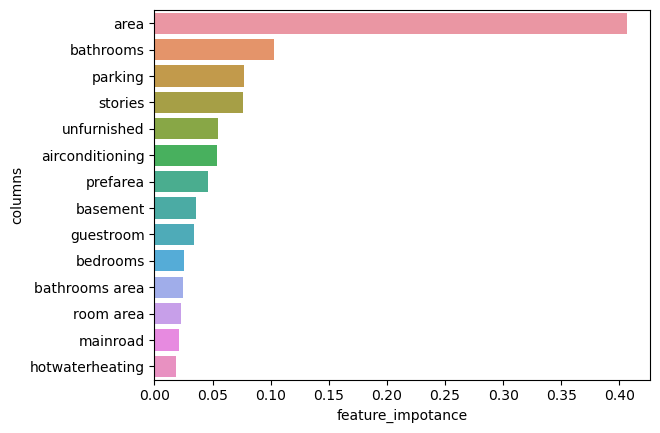

In [296]:


sns.barplot(y = feature_impotance["columns"] , x = feature_impotance['feature_impotance'])

plt.show()

In [297]:
feature_impotance.iloc[:7,:]['columns'].values

array(['area', 'bathrooms', 'parking', 'stories', 'unfurnished',
       'airconditioning', 'prefarea'], dtype=object)

In [298]:
#x = dataset[feature_impotance.iloc[:7,:]['columns'].values]

In [299]:
# from sklearn.model_selection import train_test_split

# x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state= 77)

In [300]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()
xgboost.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [301]:
predict_train_xgboost = xgboost.predict(x_train)
predict_test_xgboost = xgboost.predict(x_test)

In [302]:

print("Train : " , metrics.r2_score(y_train , predict_train_xgboost))
print()
print("Test : " , metrics.r2_score(y_test , predict_test_xgboost))

Train :  0.9972804079007623

Test :  0.6305856092413642


In [303]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor()
xg.fit(x_train , y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [304]:
predict_train_xg = xg.predict(x_train)
predict_test_xg = xg.predict(x_test)


print("Train : " , metrics.r2_score(y_train , predict_train_xg))
print()
print("Test : " , metrics.r2_score(y_test , predict_test_xg))

Train :  0.8567262003186289

Test :  0.6654863515502792


In [305]:
from sklearn.linear_model import SGDRegressor
gdmodel = SGDRegressor()
gdmodel.fit(x_train,y_train)

SGDRegressor()

In [306]:
y_pred_gdmodel_train= gdmodel.predict(x_train)
y_pred_gdmodel_test= gdmodel.predict(x_test)

print("gdmodel Train :" , metrics.r2_score(y_train , y_pred_gdmodel_train))
print("gdmodel Test :" , metrics.r2_score(y_test , y_pred_gdmodel_test))

gdmodel Train : 0.6714756513542024
gdmodel Test : 0.6850978238312666


In [307]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train , y_train)

GradientBoostingRegressor()

In [308]:
y_pred_gbr_train= gbr.predict(x_train)
y_pred_gbr_test= gbr.predict(x_test)

print("GradientBoostingRegressor Train :" , metrics.r2_score(y_train , y_pred_gbr_train))
print("GradientBoostingRegressor Test :" , metrics.r2_score(y_test , y_pred_gbr_test))


GradientBoostingRegressor Train : 0.8545795133210426
GradientBoostingRegressor Test : 0.6994070435313048


In [309]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('xbgrfr' ,  xg ) , ('gradient' , gbr)])

voting.fit(x_train , y_train)

VotingRegressor(estimators=[('xbgrfr',
                             XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            random_state=None, reg_alpha=None, ...)),
                            ('gradient', GradientBoostingRegressor())])

In [310]:
y_pred_voting_train= voting.predict(x_train)
y_pred_voting_test= voting.predict(x_test)

print("GradientBoostingRegressor Train :" , metrics.r2_score(y_train , y_pred_voting_train))
print("GradientBoostingRegressor Test :" , metrics.r2_score(y_test , y_pred_voting_test))

GradientBoostingRegressor Train : 0.8624734642949448
GradientBoostingRegressor Test : 0.6979572818889107


In [311]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(estimator= gbr , n_estimators=100 )
bag.fit(x_train , y_train)

BaggingRegressor(estimator=GradientBoostingRegressor(), n_estimators=100)

In [312]:
y_pred_bag_train= bag.predict(x_train)
y_pred_bag_test= bag.predict(x_test)

print("GradientBoostingRegressor Train :" , metrics.r2_score(y_train , y_pred_bag_train))
print("GradientBoostingRegressor Test :" , metrics.r2_score(y_test , y_pred_bag_test))

GradientBoostingRegressor Train : 0.8290755024677501
GradientBoostingRegressor Test : 0.7063404627151662


In [313]:
pd.DataFrame({'Actuall values' : y_train , "Predicted values" : y_pred_bag_train})

,Actuall values,Predicted values
356,3773000,3.928156e+06
539,1855000,2.323091e+06
249,4543000,5.382096e+06
123,5950000,5.648651e+06
527,2275000,2.757566e+06
...,...,...
117,5950000,4.790891e+06
167,5285000,5.149244e+06
441,3220000,3.436742e+06
293,4200000,3.078466e+06
